In [2]:
import json
import matplotlib.pyplot as plt

In [8]:
with open('.\\oscar_current_data_U.json', 'r') as datafile:
    u = json.load(datafile)[0]

with open('.\\oscar_current_data_V.json', 'r') as datafile:
    v = json.load(datafile)[0]

print(u['header'])
print(v['header'])

u_data = u['data']
v_data = v['data']

print(len(u_data))
print(len(v_data))

{'discipline': 10, 'disciplineName': 'Oceanographic_products', 'center': -3, 'centerName': 'Earth & Space Research', 'refTime': '2014-01-31T00:00:00.000Z', 'significanceOfRT': 0, 'significanceOfRTName': 'Analysis', 'parameterCategory': 1, 'parameterCategoryName': 'Currents', 'parameterNumber': 2, 'parameterNumberName': 'U_component_of_current', 'parameterUnit': 'm.s-1', 'forecastTime': 0, 'surface1Type': 160, 'surface1TypeName': 'Depth below sea level', 'surface1Value': 15, 'numberPoints': 519480, 'shape': 0, 'shapeName': 'Earth spherical with radius = 6,367,470 m', 'scanMode': 0, 'nx': 1080, 'ny': 481, 'lo1': 20, 'la1': 80, 'lo2': 379.6666666666667, 'la2': -80, 'dx': 0.3333333333333333, 'dy': 0.3333333333333333}
{'discipline': 10, 'disciplineName': 'Oceanographic_products', 'center': -3, 'centerName': 'Earth & Space Research', 'refTime': '2014-01-31T00:00:00.000Z', 'significanceOfRT': 0, 'significanceOfRTName': 'Analysis', 'parameterCategory': 1, 'parameterCategoryName': 'Currents', '

In [16]:
for i in range(len(u_data)):
    if ((u_data[i] == None and v_data[i] != None) or (u_data[i] != None and v_data[i] == None)):
        print('TYPE MISMATCH AT INDEX ' + str(i))
        print('U TYPE: ' + str(type(u_data[i])) + ' V TYPE: ' + str(type(v_data[i])))

TYPE MISMATCH AT INDEX 249269
U TYPE: <class 'NoneType'> V TYPE: <class 'int'>
TYPE MISMATCH AT INDEX 249270
U TYPE: <class 'NoneType'> V TYPE: <class 'float'>
TYPE MISMATCH AT INDEX 249271
U TYPE: <class 'NoneType'> V TYPE: <class 'float'>
TYPE MISMATCH AT INDEX 250349
U TYPE: <class 'NoneType'> V TYPE: <class 'float'>
TYPE MISMATCH AT INDEX 250350
U TYPE: <class 'NoneType'> V TYPE: <class 'float'>
TYPE MISMATCH AT INDEX 250351
U TYPE: <class 'NoneType'> V TYPE: <class 'float'>
TYPE MISMATCH AT INDEX 251429
U TYPE: <class 'NoneType'> V TYPE: <class 'float'>
TYPE MISMATCH AT INDEX 251430
U TYPE: <class 'NoneType'> V TYPE: <class 'float'>
TYPE MISMATCH AT INDEX 251431
U TYPE: <class 'NoneType'> V TYPE: <class 'float'>
TYPE MISMATCH AT INDEX 251433
U TYPE: <class 'NoneType'> V TYPE: <class 'float'>
TYPE MISMATCH AT INDEX 251434
U TYPE: <class 'NoneType'> V TYPE: <class 'float'>
TYPE MISMATCH AT INDEX 252511
U TYPE: <class 'NoneType'> V TYPE: <class 'float'>
TYPE MISMATCH AT INDEX 252513


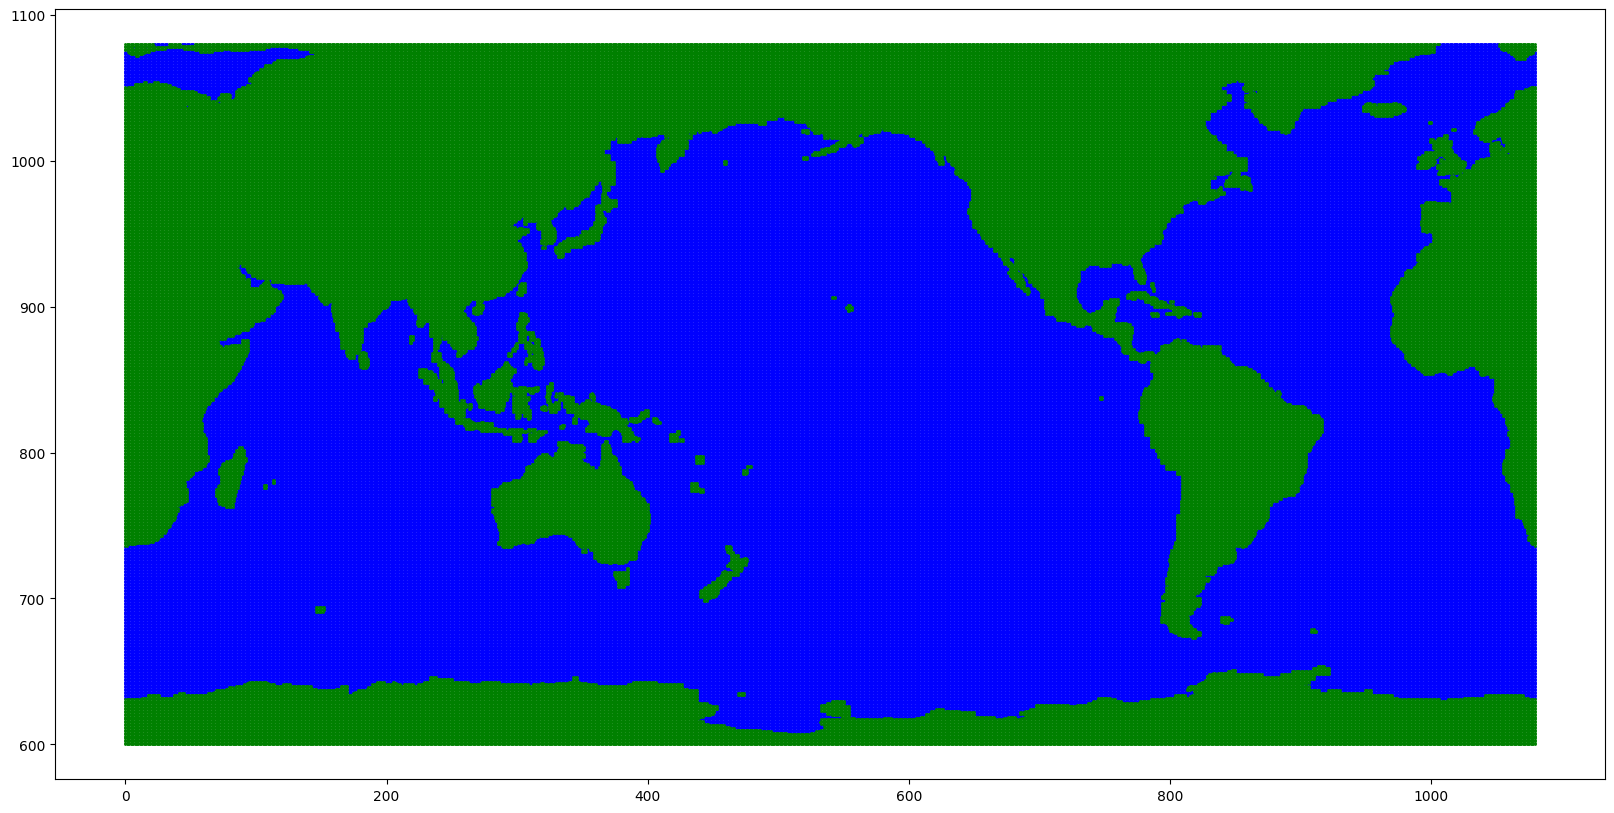

In [39]:
# plotting map

fig, ax = plt.subplots(1, figsize=(20, 10))
land_x_list = []
land_y_list = []
x_list = []
y_list = []

for i in range(len(u_data)):
    if (u_data[i] != None):
        x_list.append(int(i % 1080))
        y_list.append(1080 - int(i / 1080))
    else:
        land_x_list.append(int(i % 1080))
        land_y_list.append(1080 - int(i / 1080))
ax.scatter(x_list, y_list, s=1, c='b')
ax.scatter(land_x_list, land_y_list, s=1, c='g')
plt.show()

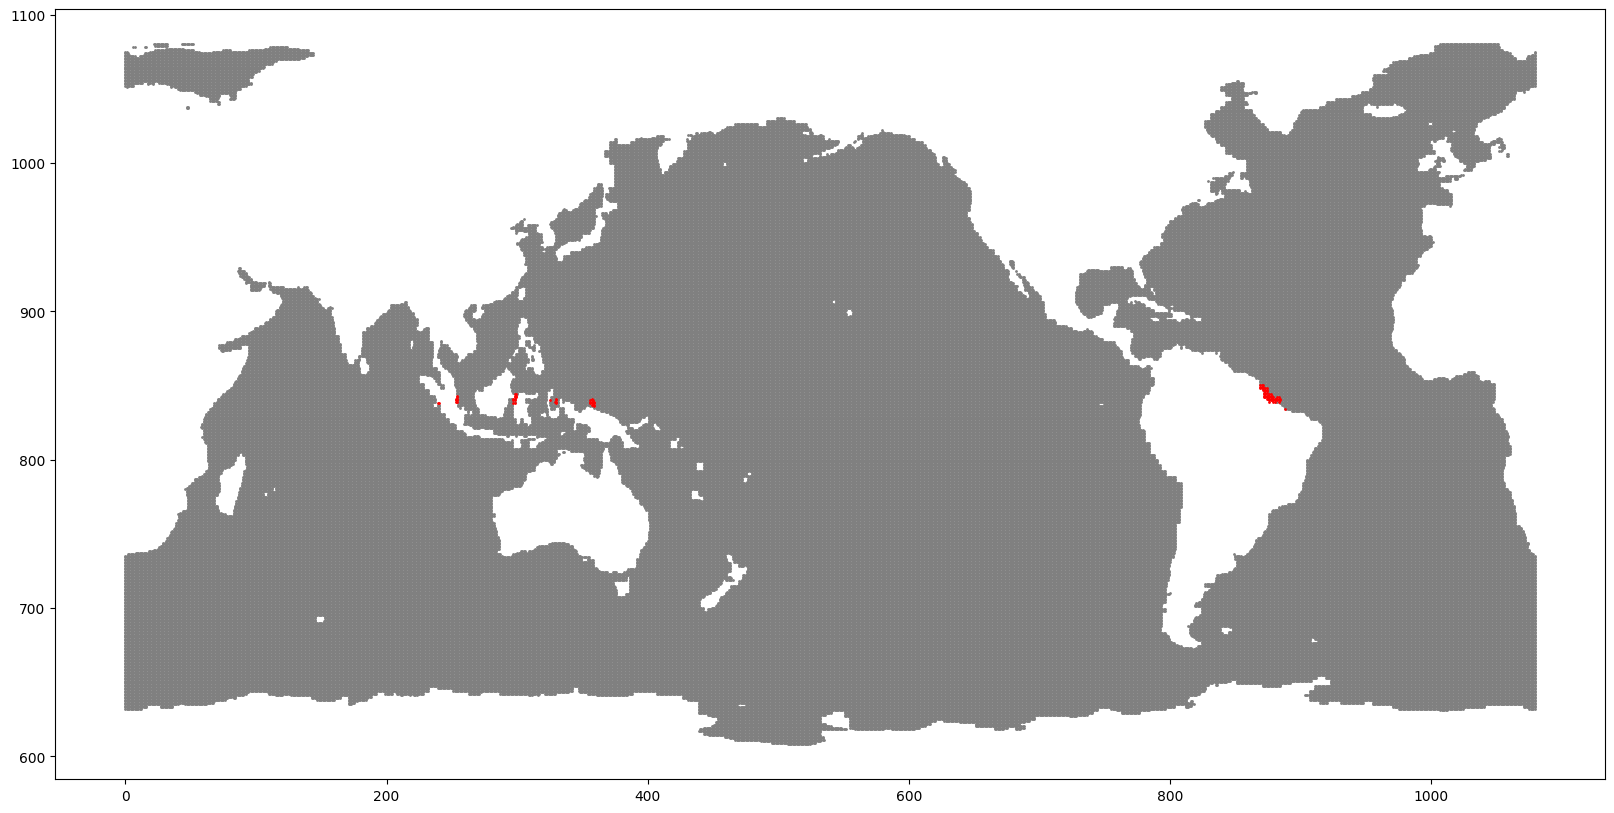

In [41]:
# checking problematic areas

fig, ax = plt.subplots(1, figsize=(20, 10))

problem_x_list = []
problem_y_list = []

for i in range(len(u_data)):
    if ((u_data[i] == None and v_data[i] != None) or (u_data[i] != None and v_data[i] == None)):
        problem_x_list.append(int(i % 1080))
        problem_y_list.append(1080 - int(i / 1080))

ax.scatter(x_list, y_list, s=1, c='gray')
ax.scatter(problem_x_list, problem_y_list, s=1, c='r')